In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

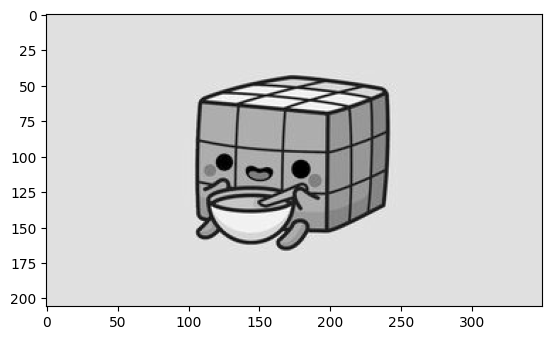

In [13]:
img = cv2.imread("../../data/CuteCube.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = "gray")


In [14]:

h,w = img.shape

img = np.pad(img, [(2, 2),(2,2)], mode='constant')
directions = np.array([[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]])
change = np.zeros((8))
for i in range(2,h+2):
    for j in range(2, w+2):
        kernel = img[i-1:i+2, j-1:j+2].copy()
        print(kernel)
        for id, d in enumerate(directions):
            p = img[i-1+d[0]:i+2+d[0], j-1+d[1]:j+2+d[1]].copy()
            #change[id] = np.sum(np.square(np.subtract(kernel, p)))
            change[id] = np.sum(np.square(np.subtract(kernel, p)))
        print(change)
        break
    break

[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
---
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]
---
---
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]
---
---
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]
---
---
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]
---
---
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]
---
---
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]
---
---
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]
---
---
[[  0   0   0]
 [  0 224 224]
 [  0 224 224]]
[[  0   

In [15]:
np.array([[1, 1], [1, 1]]) * np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])